<a href="https://colab.research.google.com/github/GezhinOleg/Py_Stat_L5/blob/main/class_and_clast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание
    1.Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
    2.Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
    3.Разделите данные на выборку для обучения и тестирования
    4.Постройте модель LDA
    5.Визуализируйте предсказания для тестовой выборки и центры классов (разделяющую плоскость можно не строить, но обратите внимание, что класса 3).
    6.Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
    7.Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [ ]:
flowers = load_iris()

In [ ]:
# загружаем данные в датафрейм
iris_data = pd.DataFrame(flowers.data, columns=flowers.feature_names)
# Делаем имена колонок такие же, как имена переменных:
iris_data.columns = flowers.feature_names
iris_data = iris_data.drop(['petal length (cm)', 'petal width (cm)'], 1)
# Добавляем столбец с целевой переменной: 
iris_data['variety'] = flowers.target
# Для наглядности добавляем столбец с сортами: 
# iris_data['name'] = iris_data.variety.apply(lambda x : flowers.target_names[x])
# Смотрим, что получилось:
data_class = flowers.target
iris_data

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, data_class, test_size=0.35)

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1,
       0, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 1, 0, 1])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [ ]:
result

,0,1
0,2,2
1,1,2
2,2,2
3,0,0
4,0,0
5,2,1
6,1,1
7,1,1
8,0,0
9,0,0


In [ ]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.7547169811320755

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.53203004,  8.62088475,  0.        ],
       [ 1.56414037, -4.86287307,  0.        ],
       [ 3.78048852, -3.67997785,  0.        ]])

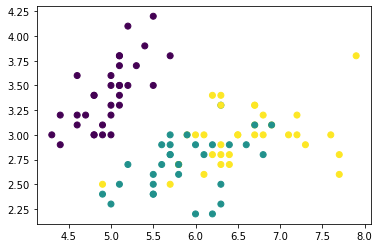

In [ ]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [ ]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

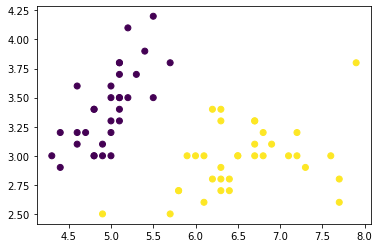

In [ ]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [ ]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [ ]:
# посмотрим на центроиды
lda_small.means_

array([[5.0516129 , 3.47741935],
       [6.5125    , 2.99375   ]])

<ipython-input-23-f28b672bf64f>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


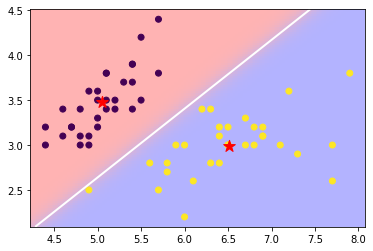

In [ ]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [ ]:
# второй признак в 17 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[ 10.13358384, -13.23948157]])

In [ ]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

## Кластеризация
### Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [ ]:
flowers = load_iris()

In [ ]:
# загружаем данные в датафрейм
iris_data = pd.DataFrame(flowers.data, columns=flowers.feature_names)
# Делаем имена колонок такие же, как имена переменных:
iris_data.columns = flowers.feature_names
iris_data = iris_data.drop(['petal length (cm)', 'petal width (cm)'], 1)
# Добавляем столбец с целевой переменной: 
iris_data['variety'] = flowers.target
# Для наглядности добавляем столбец с сортами: 
# iris_data['name'] = iris_data.variety.apply(lambda x : flowers.target_names[x])
# Смотрим, что получилось:
data_class = flowers.target
iris_data

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(iris_data)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

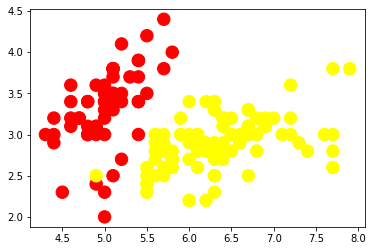

In [ ]:
plt.scatter(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'], cmap='autumn', c=clusters, s=155)
plt.show()